<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

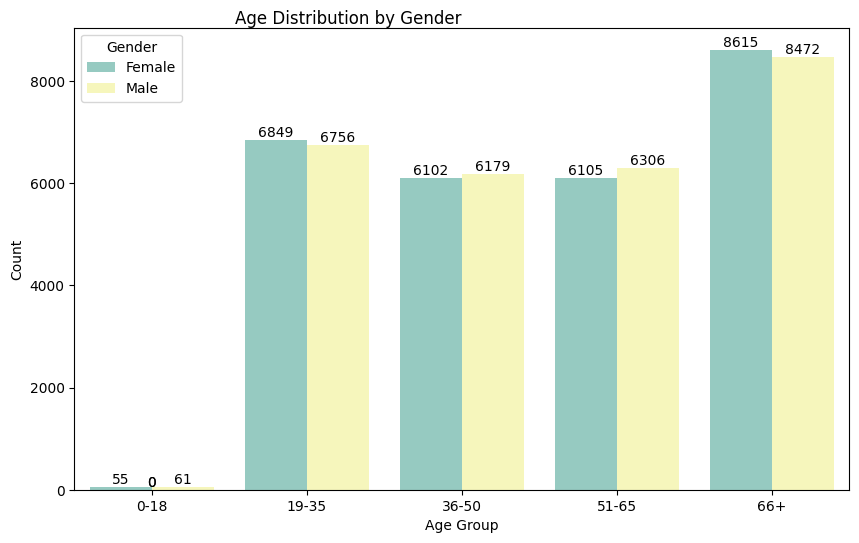

<ipython-input-25-9094b2c3e10d>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Set3')


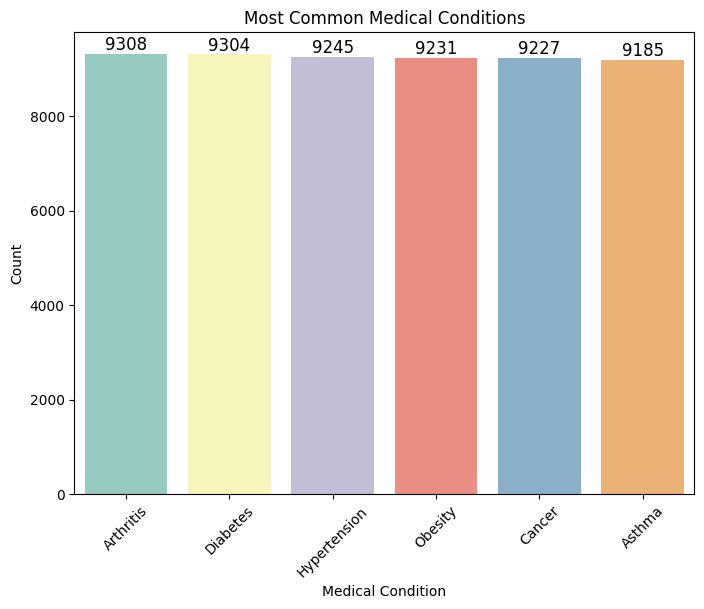

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read data from csv file /kaggle/input/healthcare-dataset/healthcare_dataset.csv
df= pd.read_csv("healthcare_dataset.csv")

#get an overview of the data using info function
print(df.info())

#getting descrptive data for numerical columns
print(df.describe())

#getting an overview of the dataset
print(df.head())

#checking for missing values or null
print(df.isnull().sum())

#checking for misspelling or inconsistencies in columns(Medical condition, blood type ,doctors,hospital, insurance provider, admission type, medication)
df["Medical Condition"].value_counts()
df["Blood Type"].value_counts()
df["Doctor"].value_counts()
df["Hospital"].value_counts()
df["Insurance Provider"].value_counts()
df["Admission Type"].value_counts()
df["Medication"].value_counts()
df["Test Results"].value_counts()

#check for negative billing in the data
negative_billing = df[df["Billing Amount"] < 0]
negative_billing.shape

#datatype conversion datetime numeric etc. to suppress errors if null values
df["Date of Admission"]=pd.to_datetime(df["Date of Admission"], errors='coerce')
df["Date of Admission"].dtype

df["Discharge Date"]=pd.to_datetime(df["Discharge Date"], errors ="coerce")
print(df["Discharge Date"].dtype)

#number of days admited

df['Days_Admitted'] = (df['Discharge Date'] - df['Date of Admission']).dt.days + 1
print(df.info())


'''

#Check number of rows in dataset
print(f"Number of rows(df):{len(df)}")'''

# Check for duplicates
print("Checking for duplicates...")
#returns a series object with True/False for rows that are duplicates
duplicates = df.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the duplicate rows if any
if duplicates.sum()>0:
 print(df[duplicates])

# Remove duplicate rows and return datframe
data_cleaned = df.drop_duplicates()

print(data_cleaned)
'''
# Convert categorical columns to 'category' data type (e.g., 'Category')
for column in data_cleaned.select_dtypes(include='object').columns:
    if column in ['Gender', 'Blood Type',"Category","Type"]:  # Specify columns if known
        data_cleaned.loc[:, column] = data_cleaned[column].astype('category')
        '''

df["Gender"]=df["Gender"].astype("category")
df["Blood Type"]=df["Blood Type"].astype("category")

print(df.info())

#modify the name, doctor , hospital column to Ctitle case
df["Name"]=df["Name"].str.title()

print(df["Name"])


age_bins =[0,18,35,50,65,100]
age_labels = ["0-18","19-35","36-50","51-65","66+"]
plt.figure(figsize=(10,6))
df["Age Group"]=pd.cut(df["Age"],bins=age_bins,labels=age_labels,right=False)
ax = sns.countplot(data=df,x="Age Group",hue="Gender" ,palette='Set3')


plt.title("Age Distribution by Gender",ha='right', va='top')
plt.xlabel("Age Group")
plt.ylabel("Count")


for p in ax.patches:
    text=int(p.get_height())
    ax.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center",
                xytext=(0, 5),
                textcoords="offset points")

plt.show()



# Count the most common medical conditions
condition_counts = df['Medical Condition'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Set3')

# Adding labels to each bar
for p in ax.patches:
    # Get the height of each bar (the count)
    height = p.get_height()

    # Add the label (count) above each bar
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,  # y-position (just above the bar)
        int(height),  # Value to display
        ha='center',   # Horizontal alignment
        va='bottom',   # Vertical alignment
        fontsize=12,   # Font size of the label
        color='black'  # Text color
    )

# Adding labels and title
plt.title('Most Common Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()